# Computational Mathematics
## An Introduction to Numerical Analysis and Scientific Computing with Python
### By Dimitrios Mitsotakis

# Chapter 8: Numerical Differentiation

## First Order Finite Difference Approximations

### Forward Differences

Assume that we want to approximate the derivative of a function $f'(x_0)$ at a point $x=x_0$.

From the definition of the derivative we know that

$$
f'(x_0)=\lim_{x\to x_0}\frac{f(x)-f(x_0)}{x-x_0}
$$

Taking $x=x_1$ very  close to $x_0$ we have that

$$
f'(x_0)\approx \frac{f(x_1)-f(x_0)}{x_1-x_0}
$$

This difference quotient is known as finite difference approximation of the derivative



#### Example

Consider for example the function $f(x)=x\sin(x)$ and assume that we want to find the derivative $f'(\pi/2)$.

We know that $f'(x)=\sin(x)+x\cos(x)$ and thus $f'(\pi/2)=1$. 

Using the finite different approximation that we have derived with $x_1=\pi/2+0.01$ and $x_0=\pi/2$ we get:

In [1]:
import numpy as np

In [2]:
def f(x):
    y = x*np.sin(x)
    return y

x0 = np.pi/2

h = 0.01

derivative = ( f(x0+h) - f(x0) ) / h
print('df(x) =',derivative, 'Error =',np.abs(derivative-1.0))

df(x) = 0.992096084232319 Error = 0.007903915767681013


Observe that the approximation is quite good, and if we take the value of `x1` closer to `x0` the result is getting better

### Backward Differences

We can write the derivative as

$$
\begin{aligned}
f'(x_0)&=\lim_{x\to x_0}\frac{f(x)-f(x_0)}{x-x_0}\\
&=\lim_{x\to x_0}\frac{f(x_0)-f(x)}{x_0-x}\\
(\mbox{ set } h=x_0-x) &= \lim_{h\to 0} \frac{f(x_0)-f(x_0-h)}{h}
\end{aligned}
$$

So taking $h$ very small ($h\ll 1$) we can see that
$$
f'(x_0)\approx \frac{f(x_0)-f(x_0-h)}{h}
$$

This approximation is called **backward difference approximation**

Similarely, we can compute the previous derivative again using the simple code:

In [3]:
x0 = np.pi/2
h = 0.01

derivative = ( f(x0) - f(x0-h) ) / h
print('df(x) =',derivative, 'Error =',np.abs(derivative-1.0))

df(x) = 1.0078039166010244 Error = 0.007803916601024419


## Second Order Accurate Finite Difference Approximations

Consider now the following formulas for the derivative:

$$f'(x_0)=\lim_{h\to 0}\frac{f(x_0+h)-f(x_0)}{h}$$

and

$$f'(x_0)=\lim_{h\to 0}\frac{f(x_0)-f(x_0-h)}{h}$$

Adding these two formulas we get

$$2 f'(x_0)=\lim_{h\to 0}\frac{f(x_0+h)-f(x_0-h)}{h}$$

and dividing by 2:

$$f'(x_0)=\lim_{h\to 0}\frac{f(x_0+h)-f(x_0-h)}{2h}$$

So taking small $h\ll 1$ we get the **central difference approximation**:


$$f'(x_0)\approx \frac{f(x_0+h)-f(x_0-h)}{2h}$$

And here is what we get in our case with $f(x)=x\sin(x)$ and $x_0=\pi/2$:

In [4]:
x0 = np.pi/2.0
h = 0.01

derivative = (f(x0+h) - f(x0-h))/(2.0*h)
print('df(x)=',derivative, 'Error=',np.abs(derivative-1.0))

df(x)= 0.9999500004166717 Error= 4.999958332829735e-05


**Remark:** Observe that for $h=0.01$ the forward and backward differences give the derivative with 2 correct decimal digits, while the central difference approximation gives the derivative with 4 correct decimal digits. The reason for that is that the central difference approximation has convergence rate 2 while for the other approximations is 1.

## Second-Order Derivatives

Assume now that we want to approximate the second derivative $f''(x_0)$.

In order to derive a formula for this derivative we again take the following Taylor polynomials:

$$f(x_0+h)=f(x_0)+hf'(x_0)+\frac{h^2}{2!}f''(x_0)+\frac{h^3}{3!}f'''(x)+\frac{h^4}{4!}f^{(4)}(c_1)$$

and

$$f(x_0-h)=f(x_0)-hf'(x_0)+\frac{h^2}{2!}f''(x_0)-\frac{h^3}{3!}f'''(x)+\frac{h^4}{4!}f^{(4)}(c_2)$$

But since we want to find the second derivative we need to add them so as to cancel the first and third-order derivatives:

$$f(x_0+h)+f(x_0-h)=2f(x_0)+h^2f''(x_0)+\frac{h^4}{24}(f^{(4)}(c_1)+f^{(4)}(c_2))$$

Solving for $f''(x_0)$ we have

$$f''(x_0)=\frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}-\frac{h^2}{24}(f^{(4)}(c_1)+f^{(4)}(c_2))$$

or better

$$f''(x_0)=\frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}+\mathcal{O}(h^2)$$

which is 2nd order accurate.

#### Example

Consider again the function $f(x)=x\sin(x)$ and $x_0=\pi/2$.

Now $f''(x)=2\cos(x)-x\sin(x)$ and thus $f''(\pi/2)=-\pi/2$

In [5]:
x0 = np.pi/2
h = 0.01

derivative2 = (f(x0+h) - 2.0*f(x0) + f(x0-h))/(h**2)
print('d2f(x) =',derivative2, 'Error =',np.abs(derivative2-(-np.pi/2)))

d2f(x) = -1.5707832368705432 Error = 1.3089924353337778e-05


## Richardson's Extrapolation

Assume we want to compute a quantity $D$ that can be approximated by $d(h)$ with an error $E(h)$:

$$D=d(h)+E(h)$$

For example if $D=f'(x_0)$ and $d(h)=(f(x_0+h)-f(x_0))/h$ then $E(h)=ch$.

In general the error function $E(h)=c h^p$ for some power $p$.

Richardson extrapolation is a computation to eliminate the error and compute the actual quantity with better accuracy. 

This can be done by considering two different values of the parameter $h_1$ and $h_2$. 

Then we have:

$$D = d(h_1)+ch_1^p$$

and 

$$D = d(h_2)+c h_2^p$$

Eliminating the constant $c$ we obtain a new formula for the quantity $D$:

$$D=\frac{(h_1/h_2)^pd(h_2)-d(h_1)}{(h_1/h_2)^p-1}$$

and if we take for simplicity $h_2=h_1/2$ we obtain:

$$D=\frac{2^p d(h_1/2)-d(h_1)}{2^p-1}$$

In the case of the forward differences we will have:

In [6]:
x0 = np.pi/2
h = 0.01

d1 = (f(x0+h) - f(x0))/h
d2 = (f(x0+h/2.0) - f(x0))/(h/2.0)

derivative = 2.0*d2-d1
print('df(x) =',derivative, 'Error =',np.abs(derivative-1.0))

df(x) = 1.000024950548184 Error = 2.4950548183966248e-05


We observe that the error became of $\mathcal{O}(h^2)$

while the new formula for the approximation of the derivative is:

$$
f'(x_0)\approx \frac{f(x_0+h)+f(x_0+h/2)-2f(x_0)}{h}
$$

## Applications to ordinary differential equations

We will introduce the simplest method for the numerical integration of o.d.e.'s namely the Euler method. We will study also the convergence of the method.

## Euler Method

The object of Euler's method is to obtain approximations to the well-posed initial-value problem

$$\frac{d}{dt}y(t)=f(t,y(t)),\quad a\leq t\leq b,\quad y(a)=y_0$$

Approximation to $y(t)$ will be obtained at various points called *mesh points* or *nodes*, in the interval $[a,b]$.

Once the approximate solution is obtained at the mesh points, the approximate solution at other points in the interval can be found by interpolation.

#### Set-up an equally-distributed mesh

We first make the assumption that the mesh points $a = t_0 < t_1 < \cdots < t_N = b$ are equally distributed throughout the interval $[a,b]$.

This condition is ensured by choosing a positive integer $N$ and selecting the mesh points

$$t_i=a+i\cdot h,\quad \mbox{for each } i=0,1,2,\ldots, N.$$

The common distance between the points 

$$h=\frac{b-a}{N}=t_{i+1}-t_i$$

is called the *stepsize* or *timestep*.

#### Derivation of the method

The simplest derivation is to approximate the derivative at a mesh point by the forward finite difference:

$$\frac{d}{dt}y(t_i)\approx \frac{y(t_{i+1})-y(t_i)}{t_{i+1}-t_i}$$

and assume that you have computed the approximation $y_i\approx y(t_i)$. Then the o.d.e at $t=t_i$ can be approximated by the finite difference formula:

$$\frac{y_{i+1}-y_i}{h}=f(t_i,y_i)$$

and thus the solution at the next timestep $y(t_{i+1})\approx y_{i+1}$ can be approximated by

$$y_{i+1}=y_i+h f(t_i,y_i).$$

So given the initial condition $y(t_0)=y_0$ we can compute

$$y(t_1)\approx y_1=y_0+h f(t_0,y_0)$$

and then given $y_1$ we can compute

$$y(t_2)\approx y_2=y_1+h f(t_1,y_1)$$

etc.

This will give the approximate solution at the mesh points $(y_0, y_1, \dots, y_N)$ only but usually is enough since we can construct an approximation of the solution at any $x\in(a,b)$ using interpolation.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

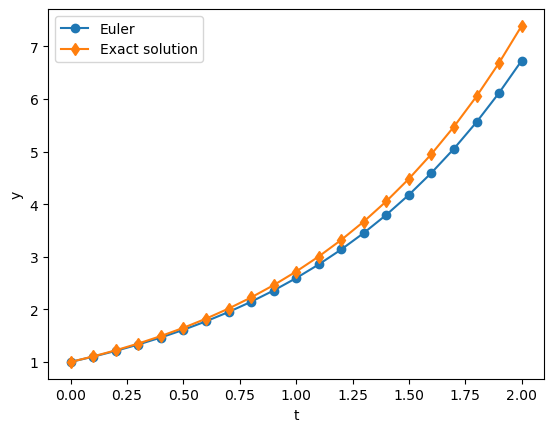

In [8]:
def f(t, y):
    return y

def euler(t, f, y0):
    n = len(t)
    y = np.zeros(n)
    h = (t[-1]-t[0])/(n-1)
    y[0]=y0
    for i in range(n-1):
        y[i+1] = y[i]+h*f(t[i], y[i])
    return y

a = 0.0; b = 2.0; N = 20
t = np.linspace(a, b, N+1)
y0 = 1.0
y = euler(t,f,y0)
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, y, '-o', label="Euler")
axes.plot(t, np.exp(t), '-d', label="Exact solution")
axes.set_xlabel("t")
axes.set_ylabel("y")
axes.legend(loc=2)
plt.show()

## The Improved Euler Method

We will derive a method with second order accuracy.

As always we consider the general first-order o.d.e. system

$$y'(t)=f(t,y(t))$$

Since we want to construct a second-order method, we start with the Taylor expansion

$$y(t+h)=y(t)+hy'(t)+\frac{h^2}{2}y''(t)+O(h^3)$$

The first derivative can be replaced by the right-hand side of the differential equation, and the second derivative is obtained by differentiating again the o.d.e., i.e.

$$
\begin{aligned}
y''(t)&=f_t(t,y)+f_y(t,y)y'(t)\\
&= f_t(t,y)+f_y(t,y)f(t,y),
\end{aligned}
$$

Therefore, the Taylor expansion becomes

$$
\begin{aligned}
y(t+h)&=y(t)+hf+\frac{h^2}{2}\left[ f_t(t,y)+f_y(t,y)f(t,y) \right]+O(h^3)\\
&= y(t)+\frac{h}{2}f(t,y)+\frac{h}{2}\left[f(t,y)+hf_t(t,y)+hf_y(t,y)f(t,y) \right]+O(h^3)
\end{aligned}
$$

Recalling the multivariate Taylor expansion

$$f(t+h,y+k)=f(t,y)+hf_t(t,y)+f_y(t,y)k+\ldots $$

We see that the expression in the square brackets can be interpreted as

$$f(t+h,y+hf(t,y))=f(t,y)+hf_t(t,y)+hf_y(t,y)f(t,y)+O(h^2)$$

Therefore, we get 

$$y(t+h)=y(t)+\frac{h}{2}f(t,y)+\frac{h}{2}f(t+h,y+hf(t,y))+O(h^3)$$

or the numerical method

$$y_{i+1}=y_i+h\left(\frac{1}{2}k_1+\frac{1}{2}k_2 \right)$$

with 

$$
\begin{aligned}
k_1 &= f(t_i,y_i)\\
k_2 &= f(t_i+h,y_i+hk_1).
\end{aligned}
$$

This is the **classical second-order Runge-Kutta method**. It is also known as the **improved Euler method**.


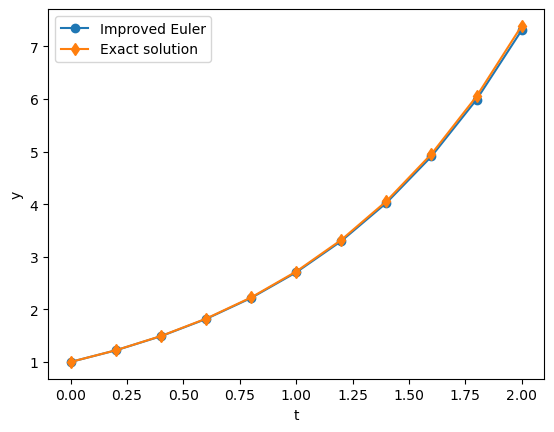

In [9]:
def f(t, y):
    return y

def improved_euler(t, f, y0):
    n = len(t)
    y = np.zeros(n)
    h = (t[-1]-t[0])/(n-1)
    y[0]=y0
    for i in range(n-1):
        k1 = f(t[i], y[i])
        k2 = f(t[i+1], y[i] + h*k1)
        y[i+1] = y[i] + 0.5*h*(k1+k2)
    return y

a = 0.0; b = 2.0; N = 10
t = np.linspace(a, b, N+1)
y0 = 1.0
y = improved_euler(t, f, y0)
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, y, '-o', label="Improved Euler")
axes.plot(t, np.exp(t), '-d', label="Exact solution")
axes.set_xlabel("t")
axes.set_ylabel("y")
axes.legend(loc=2)
plt.show()

### The notion of stability

Let's see first a problematic situation. Consider the very simple ordinary differential equation 
$$y'(t)=\lambda y(t),\quad \lambda<0\ ,$$
with initial condition $y(0)=1$. The exact solution of this problem is the function $y(t)=e^{\lambda t}$. Let's try using our code, the case with $\lambda=-10$ and with $N=5$. In this case, the timestep $h=0.4$ which is large. 


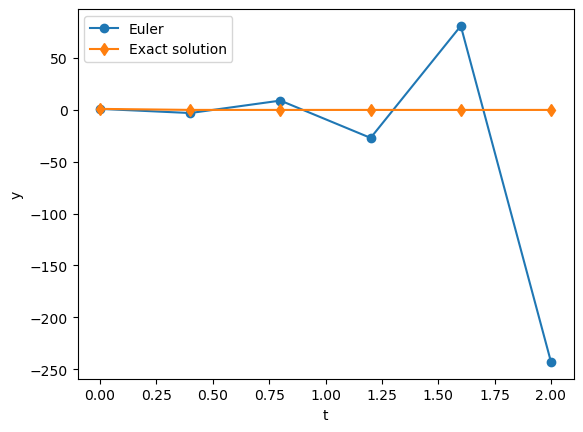

In [10]:
def f(t, y):
    return -10.0*y
a = 0.0; b = 2.0; N = 5
h = (b-a)/N
t = np.linspace(a, b, N+1)
y0 = 1.0
y = euler(t, f, y0)
# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, y, '-o', label="Euler")
axes.plot(t, np.exp(-10*t), '-d', label="Exact solution")
axes.set_xlabel("t")
axes.set_ylabel("y")
axes.legend(loc=2)
plt.show()

To understand why this is happening, we apply Euler's method to the equation $y'(t)=\lambda y(t)$ for $\lambda<0$. This gives
$y_{n+1}=y_n+h\lambda y_n$, or even better 
$$y_{n+1}=(1+h\lambda)y_n,\quad n=0,1,2,\dots, \quad \mbox{ and }\quad y_0=1\ .$$
It can easily be seen that the previous recursive sequence can be expressed explicitly as
$$y_n=(1+h\lambda)^n, \quad n=0, 1,\dots\ .$$
So, we have that
$$
\begin{array}{ll}
 |y_n|\to 0, & \mbox{ if } |1+h\lambda|<1\ , \\
 |y_n|=1, & \mbox{ if } |1+h\lambda|=1\ , \\
 |y_n|\to \infty, & \mbox{ if } |1+h\lambda|>1\ . 
\end{array}
$$

Therefore, for stability we need $|1+h\lambda|<1$. Solving this inequality for $h\lambda$ yields $-2<h\lambda<2$. Since $h>0$ and $\lambda<0$, we need $h\lambda\in (-2,0)$ or else $h<-2/\lambda$ for stability. In our previous example where $\lambda=-10$ this means $h<0.2$ and this explains the unwanted behavior for $h=0.4>0.2$. 

### The module `scipy.integrate`

Several functions for the numerical solution of general initial value problems of ordinary differential equations are available in `scipy.integrate` module of SciPy. Specifically, among the many solvers of the module `integrate` one can find the explicit Runge-Kutta-Fehlberg methods 23 and 45 implemented in the functions `RK23` and `RK45`, and the implicit Radau IIA method of order 5, implemented in the function `Radau`. In general, Radau methods with $s$ stages have order of convergence $2s-1$. All these methods can also be called via the function `solve_ivp` which we present next.

In order to demonstrate the usage of the function `solve_ivp` we consider again the initial value problem 
$$
\begin{aligned}
&y'(t)=y(t), \quad t\in (0,2]\ ,\\
&y(0)=1\ ,
\end{aligned}
$$
and we approximate its solution using the method RK45. For accurate results we consider the tolerance `rtol=1.e-6`.

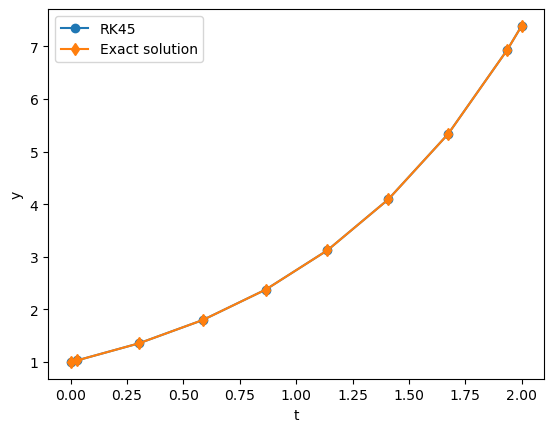

In [11]:
from scipy.integrate import solve_ivp

def f(t, y):
    return y

a = 0.0; b = 2.0
tspan = [a, b]
y0 = [1.0]

sol = solve_ivp(f, tspan, y0, 'RK45', rtol=1.e-6)

# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(sol.t, sol.y[0], '-o', label="RK45")
axes.plot(sol.t, np.exp(sol.t), '-d', label="Exact solution")
axes.set_xlabel("t")
axes.set_ylabel("y")
axes.legend(loc=2)
plt.show()
